In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import xarray as xr

/var/folders/9r/2ldmzkgd19v7hkpt8w8nvmch0000gl/T/ipykernel_37010/3359375568.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(downstream_lon, downstream_lat, 'bo', markersize=8, color='green', transform=ccrs.PlateCarree())


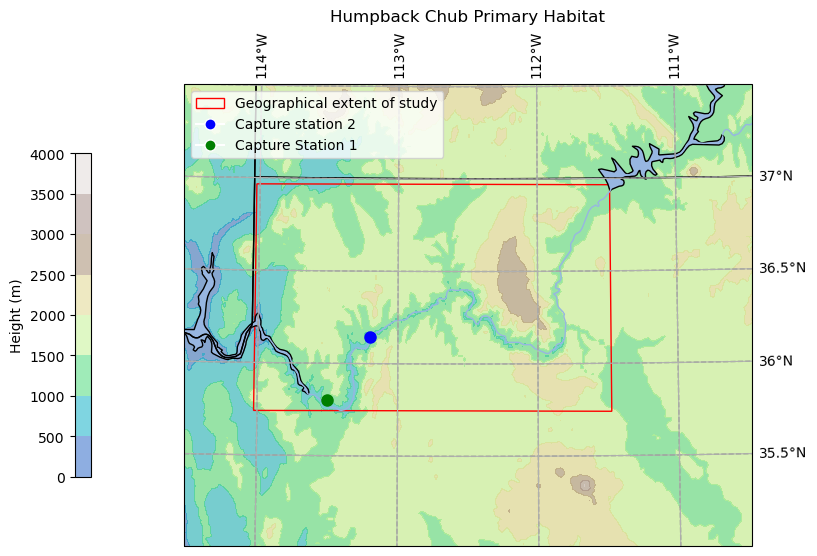

<Figure size 640x480 with 0 Axes>

In [4]:
extent = [-114.5, -110.5, 35, 37.5]  # New extent to zoom out
proj = ccrs.PlateCarree()

#load/add topo data
df_top = xr.open_dataset("~/Desktop/humpchub/ETOPO_2022_v1_60s_N90W180_bed.nc")
df_top = df_top.sel(lon=slice(-116, -108), lat=slice(34, 42))
latitude = df_top.lat.values
longitude = df_top.lon.values

z = df_top.z.values

central_lat = 37.5
central_lon = -96
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
# ax.plot(lons, lats, color='red', linewidth=2, marker='o')

coords = [-114.02379, 35.740126, -111.476798, 36.965854]
min_lon, min_lat, max_lon, max_lat = coords

y = df_top.lat.values
x = df_top.lon.values
z = df_top.z.values

contour = ax.contourf(x, y, z, cmap='terrain', alpha=0.5, transform=proj)
plt.colorbar(contour, ax=ax, label='Height (m)', orientation='vertical', pad=.1, shrink=.7, location='left')

#add lon and lat gridlines
grid = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.8, linestyle='--')
grid.left_labels = False
grid.bottom_labels = False

# Draw the rectangle
rect = Rectangle((min_lon, min_lat), max_lon - min_lon, max_lat - min_lat,
                 linewidth=1, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rect)

#plot stations
downstream_lon2 = -113.2
downstream_lat2 = 36.145
ax.plot(downstream_lon2, downstream_lat2, 'bo', markersize=8, transform=ccrs.PlateCarree())
downstream_lon = -113.505
downstream_lat = 35.8
ax.plot(downstream_lon, downstream_lat, 'bo', markersize=8, color='green', transform=ccrs.PlateCarree())

ax.set_extent(extent)

ax.set_title('Humpback Chub Primary Habitat')

legend_elements = [Rectangle((0, 0), 1, 1, edgecolor='red', facecolor='none', label='Geographical extent of study'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Capture station 2'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Capture Station 1')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_extent(extent)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.gridlines()
plt.show()
plt.savefig('../figures/Humpback_Chub_Study_Map.png')